In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
path = '/Users/rpindale/Documents/DS5100/ds5100_prog_for_ds_jv/'

https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

In [2]:
h15 = pd.read_csv('2015.csv').dropna()
h16 = pd.read_csv('2016.csv').dropna()
h17 = pd.read_csv('2017.csv').dropna()
h18 = pd.read_csv('2018.csv').dropna()
h19 = pd.read_csv('2019.csv').dropna()
h20 = pd.read_csv('WHR2020.csv').dropna()
h21 = pd.read_csv('world-happiness-report-2021.csv').dropna()

In [3]:
#print(h15.columns)
#print(h16.columns)
#print(h17.columns)
#print(h18.columns)
#print(h19.columns)
#print(h20.columns)
#print(h21.columns)


uniform_cols = ['Year',
                'Country',
                'Score',
                'GDP',
                'Social support',
                'Healthy life expectancy',
                'Freedom to make life choices',
                'Generosity',
                'Perceptions of corruption',
                'Score in Dystopia']





In [4]:
keep15_cols = ['Country', 'Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']

h15 = h15[keep15_cols]

h15['Year'] = 2015


h_15 = h15.rename(columns = {"Happiness Score":uniform_cols[2], 
                             "Economy (GDP per Capita)":uniform_cols[3],
                             "Family":uniform_cols[4], 
                             "Health (Life Expectancy)":uniform_cols[5], 
                             "Freedom": uniform_cols[6],
                             "Trust (Government Corruption)":uniform_cols[8]})

In [5]:
keep16_cols = ['Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

h16 = h16[keep16_cols]

h16['Year'] = 2016

h_16 = h16.rename(columns = {"Happiness Score":uniform_cols[2], 
                             "Economy (GDP per Capita)":uniform_cols[3],
                             "Family":uniform_cols[4], 
                             "Health (Life Expectancy)":uniform_cols[5], 
                             "Freedom": uniform_cols[6],
                             "Trust (Government Corruption)":uniform_cols[8]})
#h_16

In [6]:
keep17_cols = ['Country', 'Happiness.Score','Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.']



h17 = h17[keep17_cols]

h17['Year'] = 2017

h_17 = h17.rename(columns = {"Happiness.Score":uniform_cols[2], 
                             "Economy..GDP.per.Capita.":uniform_cols[3],
                             "Family":uniform_cols[4], 
                             "Health..Life.Expectancy.":uniform_cols[5], 
                             "Freedom": uniform_cols[6],
                             "Trust..Government.Corruption.":uniform_cols[8]})


#h_17

In [7]:
keep18_cols = ['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']



h18 = h18[keep18_cols]

h18['Year'] = 2018

h_18 = h18.rename(columns = {"Country or region":uniform_cols[1], 
                             "GDP per capita":uniform_cols[3]})

#h_18

In [8]:
keep19_cols = ['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

h19 = h19[keep19_cols]

h19['Year'] = 2019

h_19 = h19.rename(columns = {"Country or region":uniform_cols[1],
                            "GDP per capita":uniform_cols[3]})
#h_19

In [9]:
keep20_cols = ['Country name','Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

h20 = h20[keep20_cols]

h20['Year'] = 2020

h_20 = h20.rename(columns = {"Country name":uniform_cols[1],
                             "Ladder score": uniform_cols[2],
                            'Logged GDP per capita':uniform_cols[3]})
#h_20

In [10]:
keep21_cols = ['Country name','Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']


h21['Year'] = 2021
h21 = h21[keep21_cols]

h_21 = h21.rename(columns = {"Country name":uniform_cols[1],
                             "Ladder score": uniform_cols[2],
                            'Logged GDP per capita':uniform_cols[3]})
#h_21

In [11]:
happy = pd.concat((h_15, h_16, h_17, h_18, h_19, h_20, h_21))

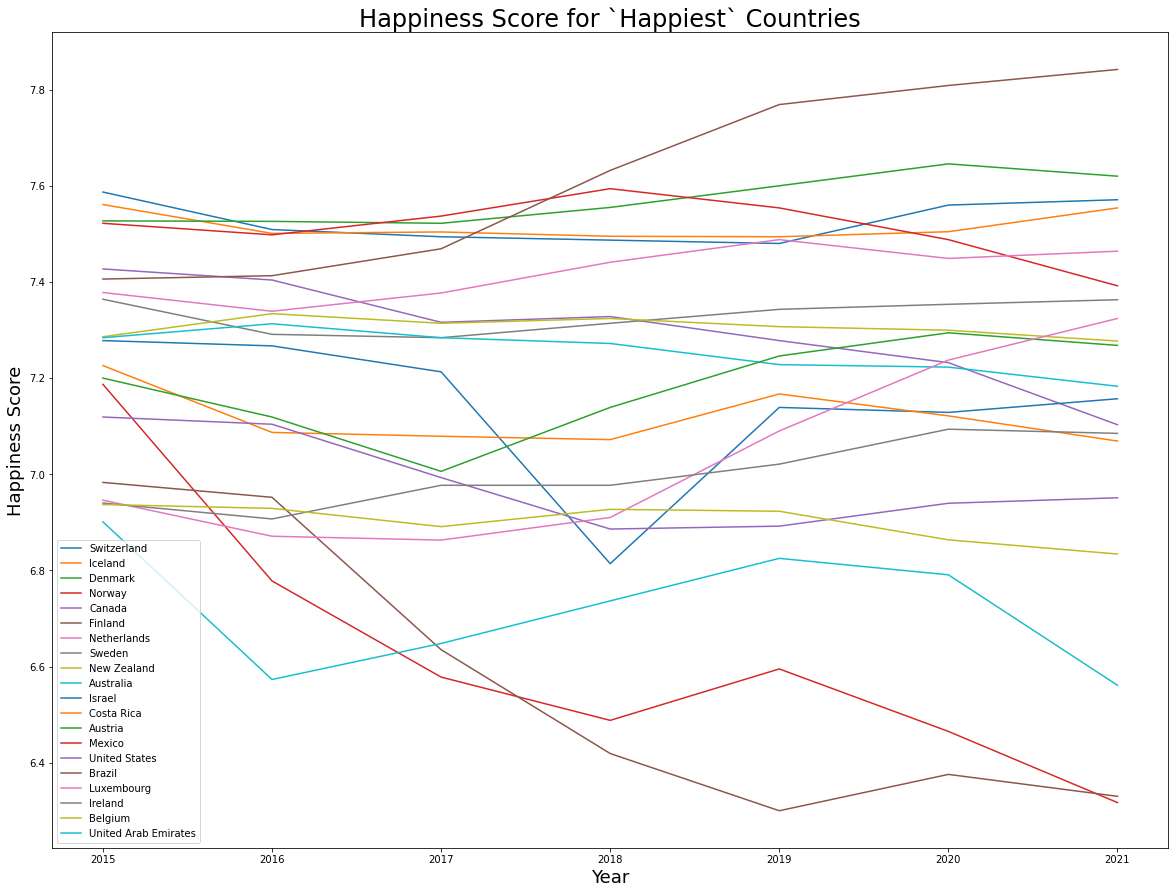

In [12]:
ax = plt.gca()

for nation in happy.Country[:20]:
    happy[happy.Country == str(nation)].plot(y='Score', x='Year', ax=ax, label=str(nation), figsize=(20,15))

plt.title('Happiness Score for `Happiest` Countries', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Happiness Score', fontsize=18)
plt.legend(loc='best')
plt.savefig(path + 'score_for_happiest.png')
plt.show()

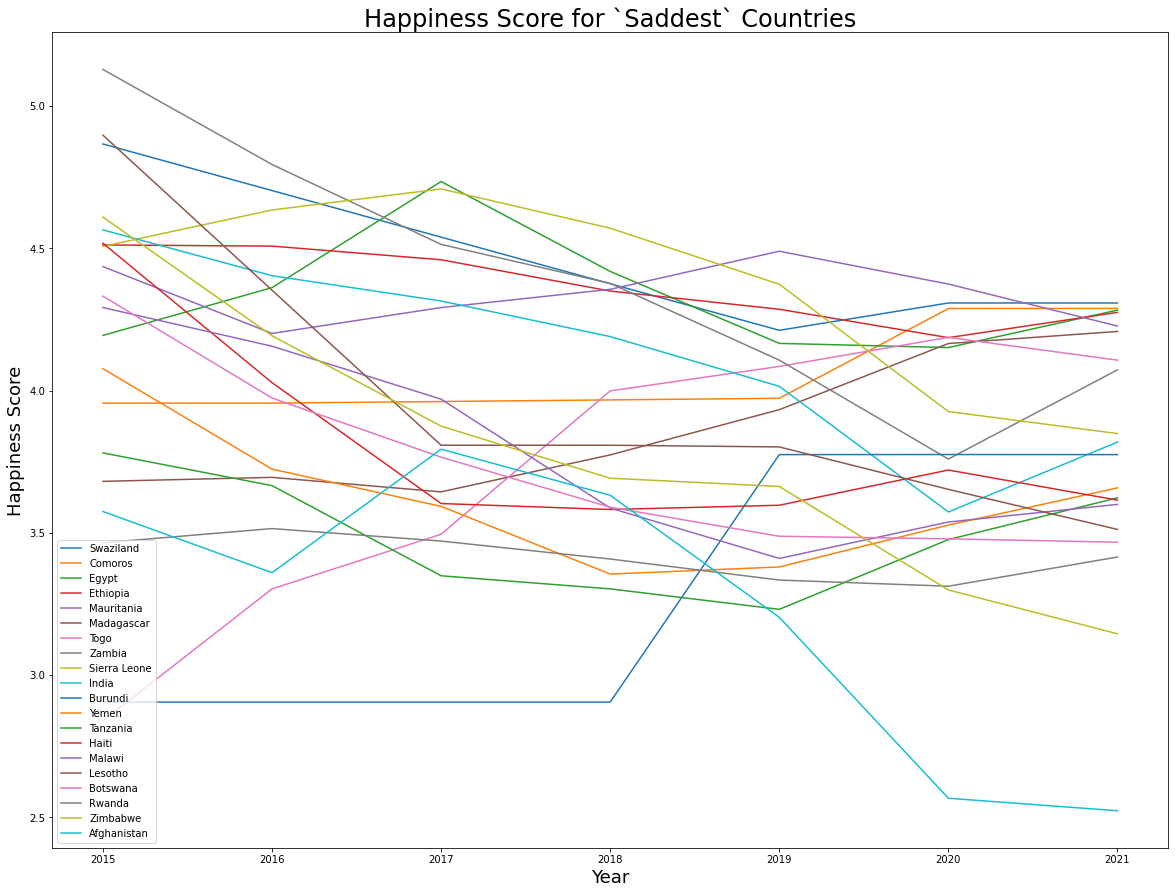

In [13]:
ax = plt.gca()

for nation in happy.Country[-20:]:
    happy[happy.Country == str(nation)].plot(y='Score', x='Year', ax=ax, label=str(nation), figsize=(20,15))



plt.title('Happiness Score for `Saddest` Countries', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Happiness Score', fontsize=18)
plt.legend(loc='best')
plt.savefig(path + 'score_for_saddest.png')
plt.show()


In [14]:
class data_explore:
    """Useful functions for exploring the data"""
    def __init__(self, data):
        """Input:
        a pandas data frame from world happiness report
        the year   int or float"""
    
        self.data = data
        self.uniform_cols = sorted(['Year','Country','Score','GDP','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
        
        
    def column_lister(self):
        """Prints out columns"""
        a=sorted(list(self.data.columns))
        print(a)
            
    def mimmax_happy(self, country):
        min_happy = min(self.data[self.data.Country == country].Score)
        max_happy = max(self.data[self.data.Country == country].Score)
        print("lowest happiness score for " + str(country) + " is: ", min_happy)
        print("\nhighest happiness score for " + str(country) + " is: ", max_happy)
        
    def worst_year(self):
        year_mean = [(np.mean(self.data.Score[self.data.Year==i]),i) for i in sorted(list(set((self.data.Year))))]
        return(sorted(year_mean)) # returns year with lowest world happiness         

    def plot_avg_happy(self):
        year_mean = [(np.mean(self.data.Score[self.data.Year==i])) for i in sorted(list(set((self.data.Year))))]
        years = range(2015,2022)
        plt.plot(years,year_mean, 'o', markersize=12, color='orange')
        plt.title('Average World Happiness Score by Year', fontsize=18)
        plt.ylabel('Average World Happiness Score',fontsize=16)
        plt.xlabel('Year', fontsize=16)
        plt.grid()
        plt.savefig(path + 'avg_score.png')
    
        

In [15]:
tester = data_explore(happy)

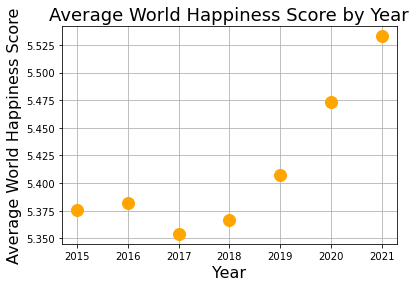

In [16]:
tester.plot_avg_happy()


In [17]:
tester.mimmax_happy('Finland')

lowest happiness score for Finland is:  7.406000000000001

highest happiness score for Finland is:  7.8420000000000005


In [18]:
tester.worst_year()[0][1]

2017

In [19]:
import unittest
class DataTestCase(unittest.TestCase): 
    
    def test_worst_year(self):
        test1 = data_explore(happy)
        print(test1.worst_year)
        
        expected = 2017
        self.assertEqual(test1.worst_year()[0][1], expected)
        
if __name__ == '__main__':
    unittest.main()   

E
ERROR: /Users/rpindale/Library/Jupyter/runtime/kernel-931bbeff-2ff4-4392-9669-2216b3e55b76 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/Users/rpindale/Library/Jupyter/runtime/kernel-931bbeff-2ff4-4392-9669-2216b3e55b76'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/Users/rpindale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
